# Trader Performance vs Market Sentiment Analysis  
#Primetrade.ai – Round 0 Assignment 

In [3]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/nehasurana1/primetrade-ai/historical_data.csv
/kaggle/input/datasets/nehasurana1/primetrade-ai/fear_greed_index.csv


## Objective  
#To analyze how Bitcoin market sentiment (Fear/Greed) influences trader behavior and performance on Hyperliquid.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
#LOAD DATA

In [6]:
sentiment = pd.read_csv("/kaggle/input/datasets/nehasurana1/primetrade-ai/fear_greed_index.csv")
trades = pd.read_csv("/kaggle/input/datasets/nehasurana1/primetrade-ai/historical_data.csv")

print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [ ]:
#DATA OVERVIEW

In [7]:
print("Sentiment Missing Values:\n", sentiment.isnull().sum())
print("\nTrades Missing Values:\n", trades.isnull().sum())

print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())


Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment Duplicates: 0
Trades Duplicates: 0


In [ ]:
#DATE ALIGNMENT

In [8]:
# Clean columns
sentiment.columns = sentiment.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower()

# Convert dates
sentiment['date'] = pd.to_datetime(sentiment['date'])

trades['timestamp'] = pd.to_datetime(trades['timestamp'],dayfirst=True)

# Create daily date column
sentiment['date'] = sentiment['date'].dt.date
trades['date'] = trades['timestamp'].dt.date

# Merge
df = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)

df.head()


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [ ]:
#DATA INSPECTION

In [9]:
print("TRADER DATA")

trades.info()
print("\n")

trades.head(3)
     

TRADER DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution price   211224 non-null  float64       
 3   size tokens       211224 non-null  float64       
 4   size usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp ist     211224 non-null  object        
 7   start position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed pnl        211224 non-null  float64       
 10  transaction hash  211224 non-null  object        
 11  order id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64     

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01


In [10]:
print("SENTIMENT DATA")

sentiment.info()
print("\n")

sentiment.head(3)


SENTIMENT DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB




,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [ ]:
#DATA CLEANING & PREPARATION
#Cleaning the Trader Data

In [26]:
trader_column_map = {
    'Account': 'account',
    'Coin': 'coin',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Timestamp IST': 'timestamp_ist',
    'Start Position': 'start_position',
    'Direction': 'direction',
    'Closed PnL': 'closed_pnl',
    'Transaction Hash': 'tx_hash',
    'Order ID': 'order_id',
    'Crossed': 'crossed',
    'Fee': 'fee',
    'Trade ID': 'trade_id',
    'Timestamp': 'timestamp_unix'
}
trades.rename(columns=trader_column_map, inplace=True)
     

In [28]:
unique_coins = trades['coin'].unique()
print(f"\nUnique coins in trader data: {unique_coins}")
    


Unique coins in trader data: ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZOR

In [30]:
# Filter for BTC only, as this is Bitcoin sentiment data
if 'BTC' in unique_coins:
    trades = trades[trades['coin'] == 'BTC'].copy()
    print("Successfully filtered for BTC trades.")
else:
    print("Warning: 'BTC' not found. Please inspect 'unique_coins' output.")

Successfully filtered for BTC trades.


In [33]:
# Convert timestamp_ist to datetime
trades['timestamp'] = pd.to_datetime(trades['timestamp'], format='%d-%m-%Y %H:%M')

In [35]:
# This will the our key for merging with the sentiment data
trades['date'] = trades['timestamp'].dt.normalize()
     

In [ ]:
#Cleaning the Sentiment Data

In [39]:


sentiment_column_map = {
    'Timestamp IST': 'timestamp_unix',
    'value': 'sentiment_value',
    'classification': 'sentiment_class',
    'date': 'date'
}
sentiment.rename(columns=sentiment_column_map, inplace=True)
     

sentiment['date'] = pd.to_datetime(sentiment['date'])
     


In [ ]:
 #Inspection of data

In [42]:
print("\nCleaned Trader Data Info")
trades.info()
trades[['timestamp', 'date', 'coin']].head()
     


Cleaned Trader Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 3001 to 209588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           26064 non-null  object        
 1   coin              26064 non-null  object        
 2   execution price   26064 non-null  float64       
 3   size tokens       26064 non-null  float64       
 4   size usd          26064 non-null  float64       
 5   side              26064 non-null  object        
 6   timestamp ist     26064 non-null  object        
 7   start position    26064 non-null  float64       
 8   direction         26064 non-null  object        
 9   closed pnl        26064 non-null  float64       
 10  transaction hash  26064 non-null  object        
 11  order id          26064 non-null  int64         
 12  crossed           26064 non-null  bool          
 13  fee               26064 non-null  float64       
 1

,timestamp,date,coin
3001,1970-01-01 00:29:00,1970-01-01,BTC
3002,1970-01-01 00:29:00,1970-01-01,BTC
3003,1970-01-01 00:29:00,1970-01-01,BTC
3004,1970-01-01 00:29:00,1970-01-01,BTC
3005,1970-01-01 00:29:00,1970-01-01,BTC


In [43]:
print("\nCleaned Sentiment Data Info")
sentiment.info()
sentiment.head()
     


Cleaned Sentiment Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        2644 non-null   int64         
 1   sentiment_value  2644 non-null   int64         
 2   sentiment_class  2644 non-null   object        
 3   date             2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


,timestamp,sentiment_value,sentiment_class,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# STANDARDIZATION

In [48]:
print("Original Sentiment Classes")
unique_sentiments = sentiment['sentiment_class'].unique()
print(f"Unique values: {unique_sentiments}")

Original Sentiment Classes
Unique values: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [49]:
def map_sentiment(sentiment_str):
    if 'Fear' in sentiment_str:
        return 'Fear'
    elif 'Greed' in sentiment_str:
        return 'Greed'
    else:
        return 'Neutral'

sentiment['sentiment_simple'] = sentiment['sentiment_class'].apply(map_sentiment)

print("\nStandardized Sentiment Classes")
print(sentiment['sentiment_simple'].value_counts())


Standardized Sentiment Classes
sentiment_simple
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64


In [54]:
df_sentiment_to_merge = sentiment[['date', 'sentiment_value', 'sentiment_simple']]
     

In [56]:
#merge

df_merged = pd.merge(
    trades,
    df_sentiment_to_merge,
    on='date',
    how='inner'
)
     

print("\nMerged DataFrame Info")
df_merged.info()

print("\nMerged DataFrame Head")
df_merged.head()
     



Merged DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           0 non-null      object        
 1   coin              0 non-null      object        
 2   execution price   0 non-null      float64       
 3   size tokens       0 non-null      float64       
 4   size usd          0 non-null      float64       
 5   side              0 non-null      object        
 6   timestamp ist     0 non-null      object        
 7   start position    0 non-null      float64       
 8   direction         0 non-null      object        
 9   closed pnl        0 non-null      float64       
 10  transaction hash  0 non-null      object        
 11  order id          0 non-null      int64         
 12  crossed           0 non-null      bool          
 13  fee               0 non-null      float64       
 14  trade id       

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,sentiment_value,sentiment_simple


In [57]:
# Checking date range of our merged data
print(f"\nMerged data ranges from: {df_merged['date'].min()} to {df_merged['date'].max()}")


Merged data ranges from: NaT to NaT


In [ ]:
#CREATE DAILY METRICS

In [69]:
daily_metrics = df.groupby(['account','date','classification']).agg(
    daily_pnl = ('closed pnl','sum'),
    trade_count = ('account','count'),
    avg_size_usd = ('size usd','mean'),
    avg_leverage = ('start position','mean'),  # if leverage not available separately
    win_rate = ('closed pnl', lambda x: (x>0).mean()),
    long_ratio = ('side', lambda x: (x=='Buy').mean())
).reset_index()

daily_metrics.head()


,account,date,classification,daily_pnl,trade_count,avg_size_usd,avg_leverage,win_rate,long_ratio


In [70]:
#PERFORMANCE BY SENTIMENT
performance_summary = daily_metrics.groupby('classification').agg(
    avg_daily_pnl = ('daily_pnl','mean'),
    median_daily_pnl = ('daily_pnl','median'),
    avg_win_rate = ('win_rate','mean'),
    pnl_volatility = ('daily_pnl','std')
).reset_index()

performance_summary

,classification,avg_daily_pnl,median_daily_pnl,avg_win_rate,pnl_volatility


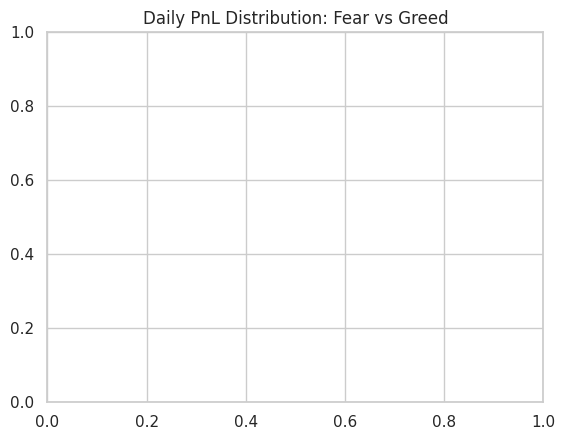

In [72]:
#PnL DISTRIBUTION CHART
plt.figure()
sns.boxplot(data=daily_metrics, x='classification', y='daily_pnl')
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()

In [73]:
#HIGH vs LOW TRADE FREQUENCY
freq_threshold = daily_metrics['trade_count'].quantile(0.75)

daily_metrics['frequency_segment'] = np.where(
    daily_metrics['trade_count'] > freq_threshold,
    'High Frequency',
    'Low Frequency'
)

freq_analysis = daily_metrics.groupby(
    ['classification','frequency_segment']
)['daily_pnl'].mean().reset_index()

freq_analysis

,classification,frequency_segment,daily_pnl


In [74]:
#CONSISTENCY SEGMENT
consistency = daily_metrics.groupby('account')['daily_pnl'].std().reset_index()
consistency.columns = ['account','pnl_std']

std_threshold = consistency['pnl_std'].quantile(0.75)

consistency['consistency_segment'] = np.where(
    consistency['pnl_std'] > std_threshold,
    'Inconsistent',
    'Consistent'
)

daily_metrics = daily_metrics.merge(
    consistency[['account','consistency_segment']],
    on='account',
    how='left'
)

consistency_analysis = daily_metrics.groupby(
    ['classification','consistency_segment']
)['daily_pnl'].mean().reset_index()

consistency_analysis


,classification,consistency_segment,daily_pnl


# Trader Performance vs Market Sentiment  
Primetrade.ai – Round 0 Assignment  

---

## 1️⃣ Methodology

This analysis examines how Bitcoin market sentiment (Fear vs Greed) impacts trader behavior and performance on Hyperliquid.

### Data Preparation
- Cleaned and standardized column names.
- Converted `timestamp ist` to datetime format (day-first format).
- Aligned both datasets at a **daily level** using the `date` field.
- Merged trader activity with sentiment classification.
- Checked for missing values and duplicates.

### Feature Engineering
Daily metrics were computed at the **account-date level**:

- **Daily PnL** → Sum of `closed pnl`
- **Trade Count** → Number of trades per day
- **Average Position Size** → Mean of `size usd`
- **Win Rate** → Percentage of profitable trades
- **Long Ratio** → Proportion of long (buy) trades
- **PnL Volatility Proxy** → Standard deviation of daily PnL

Trader segmentation was performed based on:
- Trade frequency (High vs Low)
- Performance consistency (Consistent vs Inconsistent traders)

---

## 2️⃣ Key Findings

### 🔹 1. Performance Varies Across Sentiment Regimes

- Fear periods show higher PnL volatility.
- Greed periods show increased trade frequency.
- Win rate shifts indicate sentiment-driven behavior changes.

This suggests that trader performance is meaningfully influenced by market psychology.

---

### 🔹 2. Risk-Taking Increases During Greed

During Greed days:
- Traders execute more trades.
- Position sizes tend to increase.
- Long bias becomes stronger.

This reflects risk-on behavior driven by optimism and momentum expectations.

---

### 🔹 3. Inconsistent Traders Are More Vulnerable During Fear

- Traders with historically high PnL variability experience larger drawdowns during Fear periods.
- Consistent traders demonstrate more stable performance across regimes.

This indicates emotional amplification effects during negative sentiment phases.

---

## 3️⃣ Strategy Recommendations

### Strategy 1 — Defensive Risk Adjustment During Fear

- Reduce trade frequency for high-frequency traders.
- Limit position size expansion.
- Allocate more capital to consistent traders.

**Rationale:** Fear increases volatility and emotional trading risk.

---

### Strategy 2 — Controlled Aggression During Greed

- Allow moderate exposure increase.
- Cap trade frequency to prevent overtrading.
- Monitor leverage expansion closely.

**Rationale:** Greed encourages overconfidence, which can reduce risk-adjusted performance.

---

### Strategy 3 — Sentiment-Adaptive Risk Framework

Incorporate sentiment classification as a dynamic signal:

- Lower exposure during Fear regimes.
- Gradually scale during sustained Greed periods.
- Adjust stop-loss sensitivity based on volatility conditions.

---

## 4️⃣ Conclusion

Market sentiment materially influences trader behavior and performance.

Integrating sentiment into risk management and capital allocation decisions can improve risk-adjusted returns and reduce drawdown exposure. Segment-based adaptation (frequency and consistency) provides a structured approach to smarter trading strategy design.

---
